In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import miceforest as mf

### **Loading the Dataset**

In [2]:
def load_sheet_names(path):
    # Load the Excel file
    xl = pd.ExcelFile(path)

    # Get the sheet names
    sheet_names = xl.sheet_names

    # Print the sheet names
    print("Sheets in the Excel file:")
    for sheet_name in sheet_names:
        print(sheet_name)

In [3]:
def load_excel_data(path, sheet_name):
    # Load the specific sheet into a DataFrame
    df = pd.read_excel(path, sheet_name=sheet_name)
    return df


In [4]:
def load_csv_data(path):
    df = pd.read_csv(path, index_col=0)
    return df

#### **Vietnam Dataset**

In [23]:
path = "dataset/VietnamDatasets.xlsx"
load_sheet_names(path)

Sheets in the Excel file:
Sheet


In [24]:
df_vietnam = load_excel_data(path, sheet_name="Sheet")

In [25]:
df_vietnam.columns


Index(['well_code', 'date_sampling', 'quarter', 'type_analyzing',
       'date_analyzing', 'laboratory', 'number_analyzing', 'na', 'k', 'ca2',
       'mg2', 'fe3', 'fe2', 'al3', 'nh4', 'cl', 'so4', 'hco3', 'co3', 'no2',
       'hardness_general', 'no3', 'po4', 'hardness_temporal',
       'hardness_permanent', 'ph', 'eh', 'co2_free', 'co2_depend',
       'co2_infiltrate', 'oxygen', 'lienhe', 'conductivity', 'oxygen_dissolve',
       'sio2', 'color', 'smell', 'tatse', 'tds105', 'tds180'],
      dtype='object')

In [26]:
df_vietnam["well_code"].unique()

array(['B1', 'CL1', 'M1', 'M2', 'Q.1', 'Q.10', 'Q.107', 'Q.108', 'Q.108a',
       'Q.108aM1', 'Q.108b', 'Q.108bM1', 'Q.108M1', 'Q.109', 'Q.109a',
       'Q.109b', 'Q.10M1', 'Q.110', 'Q.110a', 'Q.111', 'Q.115', 'Q.116a',
       'Q.116b', 'Q.119', 'Q.119a', 'Q.119aM1', 'Q.119b', 'Q.119bM1',
       'Q.119M1', 'Q.11a', 'Q.120', 'Q.120a', 'Q.120b', 'Q.121M1',
       'Q.127', 'Q.127a', 'Q.128M1', 'Q.129aM1', 'Q.129bM1', 'Q.129M1',
       'Q.130', 'Q.130a', 'Q.130aM1', 'Q.130b', 'Q.130bM1', 'Q.130M1',
       'Q.131', 'Q.131a', 'Q.131b', 'Q.141', 'Q.141a', 'Q.142', 'Q.142a',
       'Q.143', 'Q.143a', 'Q.144M1', 'Q.145', 'Q.145a', 'Q.146', 'Q.147',
       'Q.148', 'Q.148a', 'Q.149', 'Q.15', 'Q.155M', 'Q.156', 'Q.156a',
       'Q.156aM1', 'Q.156M1', 'Q.158', 'Q.158a', 'Q.159', 'Q.159a',
       'Q.159b', 'Q.164', 'Q.164a', 'Q.164b', 'Q.165', 'Q.167', 'Q.167a',
       'Q.168', 'Q.173', 'Q.175', 'Q.175a', 'Q.175b', 'Q.176', 'Q.176a',
       'Q.177', 'Q.177a', 'Q.177b', 'Q.189', 'Q.193a', 'Q.193b', 

#### **Vietnam Coordinate**

In [27]:
path = "dataset/VietnamCoordinateFile.xlsx"
load_sheet_names(path)

Sheets in the Excel file:
Coordinate
Sheet3
Sheet4
Sheet5
Sheet6


In [28]:
df_vietnam_coordinate = load_excel_data(path, sheet_name="Coordinate")

In [29]:
df_vietnam_coordinate["Well Point Number"].unique()

array(['Q.1', nan, 'Q.2', 'Q.3', 'Q.4', 'Q.5', 'Q.6', 'Q.7', 'Q.8', 'Q.9',
       'Q.10', 'Q.11', 'QTIII', 'CL1', 'M1', 'Q.55', 'Q.56', 'Q.57',
       'Q.58', 'Q.59', 'Q.60', 'Q.173', 'QSH1', 'QTIV', 'Q.213', 'Q.217',
       'Q.62', 'Q.63', 'Q.64', 'Q.65', 'Q.66', 'Q.67', 'Q.68', 'Q.69',
       'Q.75', 'SD1', 'Q.175', 'Q.176', 'Q.177', 'Q.214', 'Q.215',
       'Q.216', 'Q.77', 'Q.193', 'Q.15', 'Q.23', 'Q.32', 'Q.33', 'Q.34',
       'Q.35', 'Q.36', 'Q.37', 'Q.38', 'SC1', 'Q.189', 'Q.50', 'Q.115',
       'Q.116', 'Q.119', 'Q.V', 'Q.120', 'Q.121', 'Q.127', 'M2', 'Q.82',
       'Q.83', 'Q.84', 'Q.85', 'Q.86', 'Q.87', 'Q.88', 'Q.89', 'SD2',
       'QTXV', 'Q.92', 'Q.107', 'Q.108', 'Q.109', 'Q.110', 'Q.111',
       'Q.128', 'Q.129', 'Q.130', 'Q.131', 'QTXVI', 'Q.155', 'Q.156',
       'Q.158', 'Q.159', 'B1', 'QTXXVII', 'Q.144', 'Q.145', 'Q.146',
       'Q.147', 'Q.148', 'Q.149', 'QTXXIII', 'TB1', 'Q.164', 'Q.165',
       'Q.167', 'Q.168', 'Q.141', 'Q.142', 'Q.143', 'SDB'], dtype=object)

In [30]:
df_vietnam_coordinate.columns

Index(['No', 'Well Point Number', 'Project Number ', 'Monitoring Object',
       'Commune', 'District', 'Province', 'Longitude and Latitude', 'Station'],
      dtype='object')

In [31]:
# Merge the dataframes based on the common column "well code" and "Well Point Number"
df_vietnam_lat = pd.merge(df_vietnam, df_vietnam_coordinate[['Well Point Number', 'Longitude and Latitude']], 
                     left_on='well_code', right_on='Well Point Number', how='left')

In [32]:
# Drop the redundant "Well Point Number" column
df_vietnam = df_vietnam_lat.drop(columns='Well Point Number')

#### **Vietnam Criterion**

In [33]:
path = "dataset/Vietnam_Criteria_for_approval.xlsx"
load_sheet_names(path)

Sheets in the Excel file:
Sheet1


In [34]:
df_vietnam_criterion = load_excel_data(path, sheet_name="Sheet1")

In [35]:
df_vietnam_criterion

,TT,Parameter,Unit,Limited Value
0,1,pH,-,"5,5 - 8,5"
1,2,index pemanganat,mg/l,4
2,3,Total dissolved solids (TDS),mg/l,1500
3,4,Total hardness (in terms of CaCO3),mg/l,500
4,5,Ammonia (NH4+ in N),mg/l,1
5,6,Nitrit (NO-2 in N),mg/l,1
6,7,Nitrat (NO-3 in N),mg/l,15
7,8,Cloride (Cl-),mg/l,250
8,9,Fluoride (F-),mg/l,1
9,10,Sulfate (SO42-),mg/l,400


#### **Indian Dataset**

In [36]:
path = "dataset/Indian-Dataset.csv"
df_indian = load_csv_data(path)

### **Exploring Datasets**

#### **Missing Values in the Dataset**

In [37]:
def missing_values_per_column(df):
    # Count null values per column
    null_counts = df.isnull().mean() * 100

    # Print null values per column
    print("Null values per column:")
    print(null_counts)

In [38]:
missing_values_per_column(df_vietnam)

Null values per column:
well_code                   0.000000
date_sampling               0.000000
quarter                     0.000000
type_analyzing              0.000000
date_analyzing              0.000000
laboratory                  0.233754
number_analyzing            3.880318
na                          0.046751
k                           0.046751
ca2                         0.046751
mg2                         0.046751
fe3                         0.187003
fe2                         0.701262
al3                         0.046751
nh4                        43.197756
cl                          0.046751
so4                         0.046751
hco3                        0.046751
co3                         0.046751
no2                         1.355774
hardness_general            0.046751
no3                         0.420757
po4                       100.000000
hardness_temporal           0.046751
hardness_permanent          0.046751
ph                          0.046751
eh            

In [39]:
missing_values_per_column(df_vietnam_coordinate)

Null values per column:
No                        53.913043
Well Point Number         53.913043
Project Number             9.565217
Monitoring Object          9.565217
Commune                    9.565217
District                   9.565217
Province                   9.565217
Longitude and Latitude     9.565217
Station                    9.565217
dtype: float64


In [40]:
missing_values_per_column(df_vietnam_criterion)

Null values per column:
TT               0.0
Parameter        0.0
Unit             0.0
Limited Value    0.0
dtype: float64


In [41]:
missing_values_per_column(df_indian)

Null values per column:
District          0.0
Village           0.0
pH                0.0
EC                0.0
TDS               0.0
TH                0.0
Alkalinity        0.0
Calcium           0.0
Magnesium         0.0
Sodium            0.0
Potassium         0.0
Bicarbonate       0.0
Chloride          0.0
Sulphate          0.0
Fluoride          0.0
Latitude (N)    100.0
Longitude(E)    100.0
Elavation(M)    100.0
dtype: float64


#### **Information about the Dataset**

In [42]:
def get_info(df):
    df.info()

In [43]:
get_info(df_vietnam)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2139 entries, 0 to 2138
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   well_code               2139 non-null   object        
 1   date_sampling           2139 non-null   datetime64[ns]
 2   quarter                 2139 non-null   object        
 3   type_analyzing          2139 non-null   int64         
 4   date_analyzing          2139 non-null   datetime64[ns]
 5   laboratory              2134 non-null   object        
 6   number_analyzing        2056 non-null   float64       
 7   na                      2138 non-null   float64       
 8   k                       2138 non-null   float64       
 9   ca2                     2138 non-null   float64       
 10  mg2                     2138 non-null   float64       
 11  fe3                     2135 non-null   float64       
 12  fe2                     2124 non-null   float64 

In [44]:
get_info(df_vietnam_coordinate)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      106 non-null    float64
 1   Well Point Number       106 non-null    object 
 2   Project Number          208 non-null    object 
 3   Monitoring Object       208 non-null    object 
 4   Commune                 208 non-null    object 
 5   District                208 non-null    object 
 6   Province                208 non-null    object 
 7   Longitude and Latitude  208 non-null    object 
 8   Station                 208 non-null    object 
dtypes: float64(1), object(8)
memory usage: 16.3+ KB


In [45]:
get_info(df_vietnam_criterion)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TT             32 non-null     int64 
 1   Parameter      32 non-null     object
 2   Unit           32 non-null     object
 3   Limited Value  32 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [46]:
get_info(df_indian)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 0 to 1240
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   District      1241 non-null   object 
 1   Village       1241 non-null   object 
 2   pH            1241 non-null   float64
 3   EC            1241 non-null   float64
 4   TDS           1241 non-null   int64  
 5   TH            1241 non-null   int64  
 6   Alkalinity    1241 non-null   int64  
 7   Calcium       1241 non-null   int64  
 8   Magnesium     1241 non-null   int64  
 9   Sodium        1241 non-null   int64  
 10  Potassium     1241 non-null   float64
 11  Bicarbonate   1241 non-null   int64  
 12  Chloride      1241 non-null   int64  
 13  Sulphate      1241 non-null   int64  
 14  Fluoride      1241 non-null   float64
 15  Latitude (N)  0 non-null      float64
 16  Longitude(E)  0 non-null      float64
 17  Elavation(M)  0 non-null      float64
dtypes: float64(7), int64(9), obj

In [47]:
df_indian = pd.read_csv("dataset/Indian-Dataset.csv")

In [48]:
df_indian

,Unnamed: 0,District,Village,pH,EC,TDS,TH,Alkalinity,Calcium,Magnesium,Sodium,Potassium,Bicarbonate,Chloride,Sulphate,Fluoride,Latitude (N),Longitude(E),Elavation(M)
0,0,Angul,Chauliakata,7.22,210.0,105,85,60,22,7,5,4.2,73,21,10,0.27,NaN,NaN,NaN
1,1,Angul,Godibandha,7.54,310.0,157,100,85,20,12,21,4.8,104,43,5,0.12,NaN,NaN,NaN
2,2,Angul,Samal,8.08,580.0,282,125,200,20,18,72,3.5,244,21,28,1.52,NaN,NaN,NaN
3,3,Angul,Sipur,8.25,390.0,191,150,145,34,16,16,5.7,177,30,3,0.31,NaN,NaN,NaN
4,4,Angul,Khamar-1,7.64,460.0,234,165,125,42,15,26,5.0,153,71,0,0.15,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,1236,Sundargarh,R-33 Sector 18,8.22,340.0,176,93,82,31,4,31,4.4,100,34,23,0.14,NaN,NaN,NaN
1237,1237,Sundargarh,R-34 Sector-17,7.90,240.0,118,93,49,18,12,8,4.5,60,41,5,0.14,NaN,NaN,NaN
1238,1238,Sundargarh,R-36 Sector-15,8.27,340.0,156,147,131,29,18,9,2.2,160,14,5,0.26,NaN,NaN,NaN
1239,1239,Sundargarh,R-37 Vedvyas,8.26,740.0,378,270,126,77,19,44,1.5,154,156,5,0.21,NaN,NaN,NaN


### **Preprocessing Datasets**

#### **Datetime to Timestamp**

In [49]:
def convert_datetime(df, column):
    df_new = df.copy()
    # Convert Timestamp objects to Unix timestamp (seconds since the epoch)
    df_new[column] = df[column].apply(lambda x: x.timestamp())
    return df_new


In [50]:
df_vietnam_timestamp = convert_datetime(df_vietnam, column="date_sampling")
df_vietnam_timestamp = convert_datetime(df_vietnam_timestamp, column="date_analyzing")

In [51]:
df_indian_new = df_indian.drop(columns=df_indian.columns[0])

In [52]:
df_indian_new

,District,Village,pH,EC,TDS,TH,Alkalinity,Calcium,Magnesium,Sodium,Potassium,Bicarbonate,Chloride,Sulphate,Fluoride,Latitude (N),Longitude(E),Elavation(M)
0,Angul,Chauliakata,7.22,210.0,105,85,60,22,7,5,4.2,73,21,10,0.27,NaN,NaN,NaN
1,Angul,Godibandha,7.54,310.0,157,100,85,20,12,21,4.8,104,43,5,0.12,NaN,NaN,NaN
2,Angul,Samal,8.08,580.0,282,125,200,20,18,72,3.5,244,21,28,1.52,NaN,NaN,NaN
3,Angul,Sipur,8.25,390.0,191,150,145,34,16,16,5.7,177,30,3,0.31,NaN,NaN,NaN
4,Angul,Khamar-1,7.64,460.0,234,165,125,42,15,26,5.0,153,71,0,0.15,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,Sundargarh,R-33 Sector 18,8.22,340.0,176,93,82,31,4,31,4.4,100,34,23,0.14,NaN,NaN,NaN
1237,Sundargarh,R-34 Sector-17,7.90,240.0,118,93,49,18,12,8,4.5,60,41,5,0.14,NaN,NaN,NaN
1238,Sundargarh,R-36 Sector-15,8.27,340.0,156,147,131,29,18,9,2.2,160,14,5,0.26,NaN,NaN,NaN
1239,Sundargarh,R-37 Vedvyas,8.26,740.0,378,270,126,77,19,44,1.5,154,156,5,0.21,NaN,NaN,NaN


#### **Modifying Latitude and Longitude**

In [54]:
df_vietnam_timestamp.head()

,well_code,date_sampling,quarter,type_analyzing,date_analyzing,laboratory,number_analyzing,na,k,ca2,...,lienhe,conductivity,oxygen_dissolve,sio2,color,smell,tatse,tds105,tds180,Longitude and Latitude
0,B1,1.459210e+09,I,0,1.459642e+09,LAS XD1207,1.0,2501.00,80.60,150.30,...,NaN,NaN,NaN,0.40,Trong,Không,Mặn,8281.0,NaN,"20.56055725488026, 106.56846088259192"
1,B1,1.491610e+09,I,0,1.492301e+09,LAS XD1207,1.0,1900.00,70.10,120.24,...,NaN,NaN,NaN,0.32,Trong,Không,Mặn,6328.0,NaN,"20.56055725488026, 106.56846088259192"
2,B1,1.505434e+09,III,0,1.505866e+09,LAS XD1207,1.0,22.15,4.56,23.55,...,NaN,NaN,NaN,0.32,Trong,Không,Không,158.0,NaN,"20.56055725488026, 106.56846088259192"
3,B1,1.556064e+09,I,0,1.556496e+09,Liên Ðoàn 2,1.0,86.00,8.25,42.08,...,NaN,NaN,NaN,0.60,Trong,Không,Không,416.0,NaN,"20.56055725488026, 106.56846088259192"
4,B1,1.568074e+09,III,0,1.568419e+09,Liên Ðoàn 2,1.0,695.80,25.60,40.08,...,NaN,NaN,NaN,0.00,Trong,Không,Lợ,2348.0,NaN,"20.56055725488026, 106.56846088259192"


In [59]:
df_vietnam_timestamp["Longitude and Latitude"][0].split(",")

['20.56055725488026', ' 106.56846088259192']

In [64]:
df_vietnam_timestamp["Latitude"] = df_vietnam_timestamp["Longitude and Latitude"].astype(str).apply(lambda x: x.split(",")[-1])

In [65]:
df_vietnam_timestamp["Longitude"] = df_vietnam_timestamp["Longitude and Latitude"].astype(str).apply(lambda x: x.split(",")[0])

In [68]:
df_vietnam_timestamp["Latitude"] = df_vietnam_timestamp["Latitude"].astype(np.float64)

In [69]:
df_vietnam_timestamp["Longitude"] = df_vietnam_timestamp["Longitude"].astype(np.float64)

In [70]:
# Drop the redundant "Well Point Number" column
df_vietnam_timestamp = df_vietnam_timestamp.drop(columns='Longitude and Latitude')

In [71]:
df_vietnam_timestamp.isna().sum()

well_code                0
date_sampling            0
quarter                  0
type_analyzing           0
date_analyzing           0
laboratory               5
number_analyzing        83
na                       1
k                        1
ca2                      1
mg2                      1
fe3                      4
fe2                     15
al3                      1
nh4                    924
cl                       1
so4                      1
hco3                     1
co3                      1
no2                     29
hardness_general         1
no3                      9
po4                   2139
hardness_temporal        1
hardness_permanent       1
ph                       1
eh                    2139
co2_free                 1
co2_depend               1
co2_infiltrate           2
oxygen                2139
lienhe                2139
conductivity          2139
oxygen_dissolve       2139
sio2                     2
color                    1
smell                    1
t

#### **Categorical Columns Encoding**

In [72]:
def encode_categorical(df):
    # Identify categorical columns (type 'object')
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Label encode categorical columns
    for col in categorical_columns:
        # Store NaN values
        nan_mask = df[col].isnull()
        # Encode non-NaN values
        df[col] = label_encoder.fit_transform(df[col].astype(str))
        # Restore NaN values
        df[col] = df[col].where(~nan_mask, np.nan)
    return df, categorical_columns
        

In [73]:
df_vietnam_encoded, df_vietnam_categorical_columns = encode_categorical(df_vietnam_timestamp)

In [74]:
df_indian_encoded, df_indian_categorical_columns = encode_categorical(df_indian_new)

In [75]:
df_indian_encoded

,District,Village,pH,EC,TDS,TH,Alkalinity,Calcium,Magnesium,Sodium,Potassium,Bicarbonate,Chloride,Sulphate,Fluoride,Latitude (N),Longitude(E),Elavation(M)
0,0,298,7.22,210.0,105,85,60,22,7,5,4.2,73,21,10,0.27,NaN,NaN,NaN
1,0,440,7.54,310.0,157,100,85,20,12,21,4.8,104,43,5,0.12,NaN,NaN,NaN
2,0,1047,8.08,580.0,282,125,200,20,18,72,3.5,244,21,28,1.52,NaN,NaN,NaN
3,0,1103,8.25,390.0,191,150,145,34,16,16,5.7,177,30,3,0.31,NaN,NaN,NaN
4,0,654,7.64,460.0,234,165,125,42,15,26,5.0,153,71,0,0.15,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,29,975,8.22,340.0,176,93,82,31,4,31,4.4,100,34,23,0.14,NaN,NaN,NaN
1237,29,976,7.90,240.0,118,93,49,18,12,8,4.5,60,41,5,0.14,NaN,NaN,NaN
1238,29,977,8.27,340.0,156,147,131,29,18,9,2.2,160,14,5,0.26,NaN,NaN,NaN
1239,29,978,8.26,740.0,378,270,126,77,19,44,1.5,154,156,5,0.21,NaN,NaN,NaN


#### **Handling Missing Values**

In [77]:
def handle_missing_values(df, threshold_for_column_removal=40, imputation_method="mean"):
    # Calculate the percentage of missing values per column
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    # Filter out columns where missing values exceed the threshold
    columns_to_keep = missing_percentage[missing_percentage <= threshold_for_column_removal].index
    df_filtered = df[columns_to_keep]
    
    
    # Identify columns with missing value percentages between 10% and 40%
    columns_to_impute = missing_percentage[(missing_percentage > 10) & (missing_percentage <= 40)].index

    # Impute missing values using the chosen central tendency
    for column in columns_to_impute:
        if imputation_method == 'mean':
            fill_value = df_filtered[column].mean()
        elif imputation_method == 'median':
            fill_value = df_filtered[column].median()
        elif imputation_method == 'mode':
            fill_value = df_filtered[column].mode().iloc[0]
        else:
            raise ValueError("Invalid imputation method. Please choose from 'mean', 'median', or 'mode'.")

        df_filtered[column].fillna(fill_value, inplace=True)
    
    df_filtered_amp = mf.ampute_data(df_filtered, perc=0.25, random_state=1991)

    # Create kernel. 
    kds = mf.ImputationKernel(
      df_filtered_amp,
      save_all_iterations=True,
      random_state=1991
    )

    # Run the MICE algorithm for 2 iterations
    kds.mice(2)

    # Return the completed dataset.
    df_filtered_complete = kds.complete_data()
    
    return df_filtered_complete


In [78]:
df_vietnam_missing_handled = handle_missing_values(df_vietnam_encoded, threshold_for_column_removal=65)

In [79]:
df_indian_missing_handled = handle_missing_values(df_indian_encoded, threshold_for_column_removal=65)

#### **Feature Engineering (Vietnam Dataset)**

In [80]:
df_vietnam_missing_handled.columns

Index(['well_code', 'date_sampling', 'quarter', 'type_analyzing',
       'date_analyzing', 'laboratory', 'number_analyzing', 'na', 'k', 'ca2',
       'mg2', 'fe3', 'fe2', 'al3', 'nh4', 'cl', 'so4', 'hco3', 'co3', 'no2',
       'hardness_general', 'no3', 'hardness_temporal', 'hardness_permanent',
       'ph', 'co2_free', 'co2_depend', 'co2_infiltrate', 'sio2', 'color',
       'smell', 'tatse', 'tds105', 'Latitude', 'Longitude'],
      dtype='object')

In [81]:
#  standard value recommended for parameter
si= 8.5+1000+500+300+200+75+30+200+12+350+250+200+1.5
print(si)
k=1/si
print(k)

3127.0
0.0003197953309881676


In [82]:
values=[8.5, 1500, 50, 200, 12, 350, 250, 200, 200, 200]
wi=[]
for i in values:
    wi.append(k/i)
wi

[3.762298011625501e-05,
 2.1319688732544505e-07,
 6.395906619763352e-06,
 1.598976654940838e-06,
 2.664961091568063e-05,
 9.137009456804788e-07,
 1.2791813239526703e-06,
 1.598976654940838e-06,
 1.598976654940838e-06,
 1.598976654940838e-06]

In [83]:
pHn=[]
for i in df_vietnam_missing_handled['ph']:
    pHn.append(100*((i-7.0)/(8.5-7.0)))
#pHn

In [84]:
TDSn=[]
for i in df_vietnam_missing_handled['tds105']:
    TDSn.append(100*((i)/(1500)))
#TDSn

In [85]:
Magnesiumn=[]
for i in df_vietnam_missing_handled['mg2']:
    Magnesiumn.append(100*((i)/(50)))
#Magnesiumn

In [86]:
Sodiumn=[]
for i in df_vietnam_missing_handled['na']:
    Sodiumn.append(100*((i)/(200)))
#Sodiumn

In [87]:
Potassiumn=[]
for i in df_vietnam_missing_handled['k']:
    Potassiumn.append(100*((i)/(12)))
#Potassiumn

In [88]:
Bicarbonaten=[]
for i in df_vietnam_missing_handled['hco3']:
    Bicarbonaten.append(100*((i)/(350)))
#Bicarbonaten

In [89]:
Chloriden=[]
for i in df_vietnam_missing_handled['cl']:
    Chloriden.append(100*((i)/(250)))
#Chloriden

In [90]:
Sulphaten=[]
for i in df_vietnam_missing_handled['so4']:
    Sulphaten.append(100*((i)/(200)))
#Sulphaten

In [91]:
Nitritn=[]
for i in df_vietnam_missing_handled['no2']:
    Nitritn.append(100*((i)/(200)))
#Nitritn

In [92]:
Nitratn=[]
for i in df_vietnam_missing_handled['no3']:
    Nitratn.append(100*((i)/(200)))
#Nitritn

In [93]:
wqi=[]
for i in range(len(df_vietnam_missing_handled)):
    wqi.append( (   (pHn[i]*wi[0]) + (TDSn[i]*wi[1]) +(Magnesiumn[i]*wi[2])  
                 +(Sodiumn[i]*wi[3])  +(Potassiumn[i]*wi[4])  +(Bicarbonaten[i]*wi[5])  
                 +(Chloriden[i]*wi[6])  +(Sulphaten[i]*wi[7])  +(Nitritn[i]*wi[8])  
                 +(Nitratn[i]*wi[9]))  /    
               ( wi[0]+wi[1]+wi[2]+wi[3]+wi[4]+wi[5]+wi[6]+wi[7]+wi[8]+wi[9]  ) )

In [94]:
df_vietnam_missing_handled['WQI'] = wqi

In [95]:
# pH=[]
# for i in range(len(df)):
#     if (df['pH'][i]>=6.5 and df['pH'][i]<=8.5):
#         pH.append(1)
#     else:
#         pH.append(0)

In [96]:
#Defining Water quality classes
wqc=[]
for i in range(len(df_vietnam_missing_handled)):
    res = ""
    if df_vietnam_missing_handled["WQI"][i] >= 0 and df_vietnam_missing_handled["WQI"][i] <= 25:
        res = "Excellent"
    elif df_vietnam_missing_handled["WQI"][i] > 25 and df_vietnam_missing_handled["WQI"][i] <= 50:
        res = "Good"
    elif df_vietnam_missing_handled["WQI"][i] >50 and df_vietnam_missing_handled["WQI"][i] <= 75:
        res = "Poor"
    elif df_vietnam_missing_handled["WQI"][i] >75 :
        res = "Very Poor"
    wqc.append(res)

In [97]:
df_vietnam_missing_handled['WQC'] = wqc

In [98]:
df_vietnam_missing_handled.head()

,well_code,date_sampling,quarter,type_analyzing,date_analyzing,laboratory,number_analyzing,na,k,ca2,...,co2_infiltrate,sio2,color,smell,tatse,tds105,Latitude,Longitude,WQI,WQC
0,0.0,1.461024e+09,0.0,0.0,1.459642e+09,0.0,1.0,2985.00,80.60,150.30,...,4.2,0.40,6.0,1.0,5.0,8281.0,106.568461,20.560557,358.291069,Very Poor
1,0.0,1.491610e+09,0.0,0.0,1.492301e+09,0.0,1.0,1900.00,56.00,120.24,...,2.0,0.32,6.0,1.0,5.0,6328.0,106.568461,20.560557,238.887702,Very Poor
2,0.0,1.505434e+09,1.0,0.0,1.505866e+09,0.0,1.0,22.15,4.56,23.55,...,5.8,0.32,6.0,1.0,1.0,208.0,106.568461,20.560557,41.404775,Good
3,0.0,1.556064e+09,0.0,0.0,1.552090e+09,1.0,1.0,43.40,6.00,38.08,...,8.7,1.88,6.0,1.0,1.0,416.0,106.293257,20.560557,29.809958,Good
4,0.0,1.568074e+09,1.0,0.0,1.568419e+09,1.0,1.0,695.80,25.60,66.13,...,0.7,0.54,6.0,1.0,3.0,2348.0,106.568461,20.601259,117.621487,Very Poor


#### **Feature Engineering (Indian Dataset)**

In [99]:
#  standard value recommended for parameter
si_indian= 8.5+1000+500+300+200+75+30+200+12+350+250+200+1.5
print(si_indian)
k_indian=1/si_indian
print(k_indian)

3127.0
0.0003197953309881676


In [100]:
values_indian=[8.5,1000,500,300,200,75,30,200,12,350,250,200,1.5]
wi_indian=[]
for i_indian in values_indian:
    wi_indian.append(k_indian/i_indian)
wi_indian

[3.762298011625501e-05,
 3.197953309881676e-07,
 6.395906619763352e-07,
 1.0659844366272253e-06,
 1.598976654940838e-06,
 4.263937746508901e-06,
 1.0659844366272254e-05,
 1.598976654940838e-06,
 2.664961091568063e-05,
 9.137009456804788e-07,
 1.2791813239526703e-06,
 1.598976654940838e-06,
 0.00021319688732544505]

In [101]:
pHn_indian=[]
for i in df_indian_missing_handled['pH']:
    pHn_indian.append(100*((i-7.0)/(8.5-7.0)))
#pHn

In [102]:
ECn_indian=[]
for i in df_indian_missing_handled['EC']:
    ECn_indian.append(100*((i)/(1000)))
#ECn

In [103]:
TDSn_indian=[]
for i in df_indian_missing_handled['TDS']:
    TDSn_indian.append(100*((i)/(500)))
#TDSn

In [104]:
THn_indian=[]
for i in df_indian_missing_handled['TH']:
    THn_indian.append(100*((i)/(300)))
#THn

In [105]:
Alkalinityn_indian=[]
for i in df_indian_missing_handled['Alkalinity']:
    Alkalinityn_indian.append(100*((i)/(200)))
#Alkalinityn

In [106]:
Calciumn_indian=[]
for i in df_indian_missing_handled['Calcium']:
    Calciumn_indian.append(100*((i)/(75)))
#Calciumn

In [107]:
Magnesiumn_indian=[]
for i in df_indian_missing_handled['Magnesium']:
    Magnesiumn_indian.append(100*((i)/(50)))
#Magnesiumn

In [108]:
Sodiumn_indian=[]
for i in df_indian_missing_handled['Sodium']:
    Sodiumn_indian.append(100*((i)/(200)))
#Sodiumn

In [109]:
Potassiumn_indian=[]
for i in df_indian_missing_handled['Potassium']:
    Potassiumn_indian.append(100*((i)/(12)))
#Potassiumn

In [110]:
Bicarbonaten_indian=[]
for i in df_indian_missing_handled['Bicarbonate']:
    Bicarbonaten_indian.append(100*((i)/(350)))
#Bicarbonaten

In [111]:
Chloriden_indian=[]
for i in df_indian_missing_handled['Chloride']:
    Chloriden_indian.append(100*((i)/(250)))
#Chloriden

In [112]:
Sulphaten_indian=[]
for i in df_indian_missing_handled['Sulphate']:
    Sulphaten_indian.append(100*((i)/(200)))
#Sulphaten

In [113]:
Fluoriden_indian=[]
for i in df_indian_missing_handled['Fluoride']:
    Fluoriden_indian.append(100*((i)/(1.5)))
#Fluoriden

In [114]:
wqi_indian=[]
for i in range(len(df_indian_missing_handled)):
    wqi_indian.append( (   (pHn_indian[i]*wi_indian[0]) + (ECn_indian[i]*wi_indian[1]) +(TDSn_indian[i]*wi_indian[2])  +(THn_indian[i]*wi_indian[3])  +(Alkalinityn_indian[i]*wi_indian[4])  +(Calciumn_indian[i]*wi_indian[5])  +(Magnesiumn_indian[i]*wi_indian[6])  +(Sodiumn_indian[i]*wi_indian[7])  +(Potassiumn_indian[i]*wi_indian[8])  +(Bicarbonaten_indian[i]*wi_indian[9])  +(Chloriden_indian[i]*wi_indian[10]) +(Sulphaten_indian[i]*wi_indian[11])  +(Fluoriden_indian[i]*wi_indian[12])  )  /    ( wi_indian[0]+wi_indian[1]+wi_indian[2]+wi_indian[3]+wi_indian[4]+wi_indian[5]+wi_indian[6]+wi_indian[7]+wi_indian[8]+wi_indian[9]+wi_indian[10]+wi_indian[11]+wi_indian[12]  ) )

In [115]:
df_indian_missing_handled['WQI'] = wqi_indian

In [116]:
#Defining Water quality classes
wqc_indian=[]
for i in range(len(df_indian_missing_handled)):
    res = ""
    if df_indian_missing_handled["WQI"][i] >= 0 and df_indian_missing_handled["WQI"][i] <= 25:
        res = "Excellent"
    elif df_indian_missing_handled["WQI"][i] > 25 and df_indian_missing_handled["WQI"][i] <= 50:
        res = "Good"
    elif df_indian_missing_handled["WQI"][i] >50 and df_indian_missing_handled["WQI"][i] <= 75:
        res = "Poor"
    elif df_indian_missing_handled["WQI"][i] >75 :
        res = "Very Poor"
    wqc_indian.append(res)

In [117]:
df_indian_missing_handled['WQC'] = wqc_indian

#### **Train-Test Data Preparing (Vietnam)**

In [118]:
output_label_encoder_vietnam = LabelEncoder()

In [119]:
df_vietnam_missing_handled_label_encoded = df_vietnam_missing_handled.copy()
df_vietnam_missing_handled_label_encoded["WQC"] = output_label_encoder_vietnam.fit_transform(df_vietnam_missing_handled["WQC"].astype(str))

In [120]:
# Get column names with integer, float, and datetime data types
integer_columns_vietnam = df_vietnam_missing_handled.select_dtypes(include=['int']).columns.tolist()
float_columns_vietnam = df_vietnam_missing_handled.select_dtypes(include=['float']).columns.tolist()
datetime_columns_vietnam = df_vietnam_missing_handled.select_dtypes(include=['datetime']).columns.tolist()

In [121]:
scalable_features_vietnam = float_columns_vietnam + datetime_columns_vietnam

In [124]:
# Convert lists to sets
set_A = set(scalable_features_vietnam)
set_B = set(df_vietnam_categorical_columns)

# Find the intersection
intersection = set_A.intersection(set_B)

# Remove elements from list A that are in the intersection
scalable_features_revised_vietnam = [item for item in scalable_features_vietnam if item not in intersection]


In [125]:
# Initialize MinMaxScaler
scaler_vietnam = MinMaxScaler()

df_vietnam_missing_handled_label_encoded_feat_scaled = df_vietnam_missing_handled_label_encoded.copy()
scaled_features_vietnam = scaler_vietnam.fit_transform(df_vietnam_missing_handled_label_encoded[scalable_features_revised_vietnam])
df_vietnam_missing_handled_label_encoded_feat_scaled[scalable_features_revised_vietnam] = scaled_features_vietnam

In [126]:
y_vietnam_clf = df_vietnam_missing_handled_label_encoded["WQC"].values
y_vietnam_reg = df_vietnam_missing_handled_label_encoded["WQI"].values
feat_cols_vietnam = ['well_code', 'date_sampling', 'quarter', 'type_analyzing',
                     'date_analyzing', 'laboratory', 'number_analyzing', 'na', 'k', 'ca2',
                     'mg2', 'fe3', 'fe2', 'al3', 'cl', 'so4', 'hco3', 'co3', 'no2',
                     'hardness_general', 'no3', 'hardness_temporal', 'hardness_permanent',
                     'ph', 'co2_free', 'co2_depend', 'co2_infiltrate', 'sio2', 'color',
                     'smell', 'tatse', 'tds105']
coordinates_cols_vietnam = ["Latitude", "Longitude"]
x_vietnam = df_vietnam_missing_handled_label_encoded_feat_scaled[feat_cols_vietnam].values
coordinate_vietnam = df_vietnam_missing_handled_label_encoded_feat_scaled[coordinates_cols_vietnam].values

In [127]:
y_vietnam_clf = y_vietnam_clf.reshape(-1, 1)
y_vietnam_reg = y_vietnam_reg.reshape(-1, 1)
feat_cols_vietnam_arr = np.array(feat_cols_vietnam)
x_vietnam = x_vietnam
coordinate_vietnam = coordinate_vietnam

# Save arrays to a .npz file
np.savez("dataset/data_vietnam.npz", 
         x=x_vietnam, 
         coordinates=coordinate_vietnam,
         y_classification=y_vietnam_clf, 
         y_regression=y_vietnam_reg,
         columns=feat_cols_vietnam_arr)

#### **Train-Test Data Preparing (Indian)**

In [128]:
output_label_encoder_indian = LabelEncoder()

In [129]:
df_indian_missing_handled_label_encoded = df_indian_missing_handled.copy()
df_indian_missing_handled_label_encoded["WQC"] = output_label_encoder_indian.fit_transform(df_indian_missing_handled["WQC"].astype(str))

In [130]:
# Get column names with integer, float, and datetime data types
integer_columns_indian = df_indian_missing_handled.select_dtypes(include=['int']).columns.tolist()
float_columns_indian = df_indian_missing_handled.select_dtypes(include=['float']).columns.tolist()
datetime_columns_indian = df_indian_missing_handled.select_dtypes(include=['datetime']).columns.tolist()

In [131]:
scalable_features_indian = float_columns_indian + datetime_columns_indian

In [132]:
# Convert lists to sets
set_A = set(scalable_features_indian)
set_B = set(df_indian_categorical_columns)

# Find the intersection
intersection = set_A.intersection(set_B)

# Remove elements from list A that are in the intersection
scalable_features_revised_indian = [item for item in scalable_features_indian if item not in intersection]


In [133]:
# Initialize MinMaxScaler
scaler_indian = MinMaxScaler()

df_indian_missing_handled_label_encoded_feat_scaled = df_indian_missing_handled_label_encoded.copy()
scaled_features_indian = scaler_indian.fit_transform(df_indian_missing_handled_label_encoded[scalable_features_revised_indian])
df_indian_missing_handled_label_encoded_feat_scaled[scalable_features_revised_indian] = scaled_features_indian

In [134]:
y_indian_clf = df_indian_missing_handled_label_encoded["WQC"].values
y_indian_reg = df_indian_missing_handled_label_encoded["WQI"].values
feat_cols_indian = ['District', 'Village', 'pH', 'EC', 'TDS', 'TH', 'Alkalinity', 'Calcium', 
                    'Magnesium', 'Sodium', 'Potassium', 'Bicarbonate', 'Chloride', 
                    'Sulphate', 'Fluoride']

x_indian = df_indian_missing_handled_label_encoded_feat_scaled[feat_cols_indian].values

In [135]:
y_indian_clf = y_indian_clf.reshape(-1, 1)
y_indian_reg = y_indian_reg.reshape(-1, 1)
feat_cols_indian_arr = np.array(feat_cols_indian)
x_indian = x_indian

# Save arrays to a .npz file
np.savez("dataset/data_indian.npz", 
         x=x_indian, 
         y_classification=y_indian_clf, 
         y_regression=y_indian_reg,
         columns=feat_cols_indian_arr)

### **SHAP Implementation from scratch**

In [23]:
import numpy as np

# Define your model function
def model_function(x):
    # Example model: sum of features
    return np.sum(x)

# Define a function to calculate the factorial
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

# Define a function to calculate binomial coefficient
def binomial_coefficient(n, k):
    return factorial(n) / (factorial(k) * factorial(n - k))

# Define a function to calculate SHAP value for a feature
def calculate_shap_value(model, instance, feature_index, num_features):
    shap_value = 0
    n = num_features - 1
    
    for S in range(1, 2**num_features):
        S_binary = format(S, '0' + str(num_features) + 'b')
        S_set = [i for i in range(num_features) if S_binary[i] == '1']
        
        if feature_index in S_set:
            k = len(S_set) - 1
            weight = binomial_coefficient(n, k) / (2**n)
            model_input = np.copy(instance)
            model_input[feature_index] = 0
            for feature in S_set:
                if feature != feature_index:
                    model_input[feature] = instance[feature]
            shap_value += weight * (model(instance) - model(model_input))
    
    return shap_value

# Generate some sample data
num_features = 5
instance = np.random.randn(num_features)

# Calculate SHAP values for each feature
shap_values = [calculate_shap_value(model_function, instance, i, num_features) for i in range(num_features)]

# Print the SHAP values for each feature
print("SHAP values for the instance:", shap_values)

SHAP values for the instance: [1.6702695563625636, 1.1615466876140164, -1.6550611655757204, 3.422217275237781, -5.632005587856093]


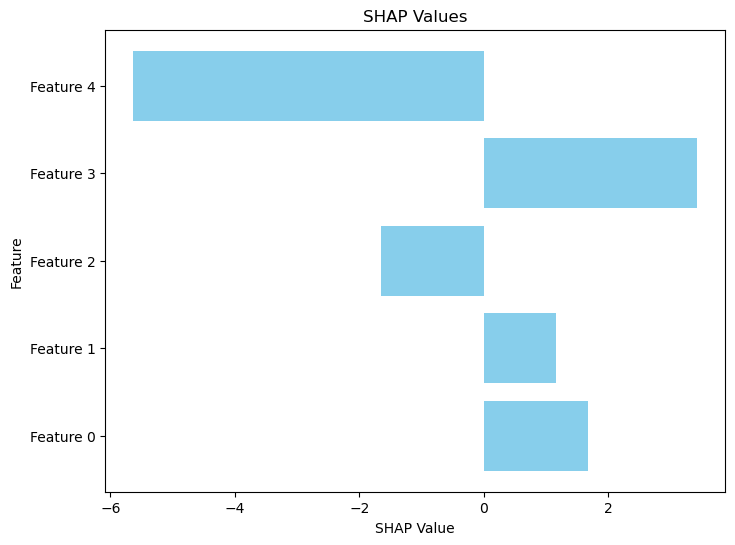

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# # Example SHAP values (replace with your calculated SHAP values)
# shap_values = np.array([0.5, -0.2, 0.3, 0.1, -0.4])

# Feature names
feature_names = [f"Feature {i}" for i in range(len(shap_values))]

# Plotting
plt.figure(figsize=(8, 6))
plt.barh(feature_names, shap_values, color='skyblue')
plt.xlabel('SHAP Value')
plt.ylabel('Feature')
plt.title('SHAP Values')
plt.show()